In [1]:
# Importation des librairies :

import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Importation des données :

billet = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_10/Billets.csv',sep = ';')
billet_prod = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_10/Billets_production.csv')

In [3]:
# Résume des données :

billet.info()
billet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [4]:
# Identification des lignes ayant des données manquantes:

print(billet.index[billet.isnull().any(axis = 1)])
print(billet.isna().sum())

Int64Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,
             481,  505,  611,  654,  675,  710,  739,  742,  780,  798,  844,
             845,  871,  895,  919,  945,  946,  981, 1076, 1121, 1176, 1303,
            1315, 1347, 1435, 1438],
           dtype='int64')
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [5]:
# Vérrification des valeurs du champ 'is_genuine' : 

billet['is_genuine'].unique()

array([ True, False])

In [6]:
# Encodage de la variable 'is_genuine' : 

billet['is_genuine'].replace([False,True], [0,1], inplace = True)
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [7]:
# Vérrification des informations du Dataframe 'billet' : 

billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


<AxesSubplot:ylabel='margin_low'>

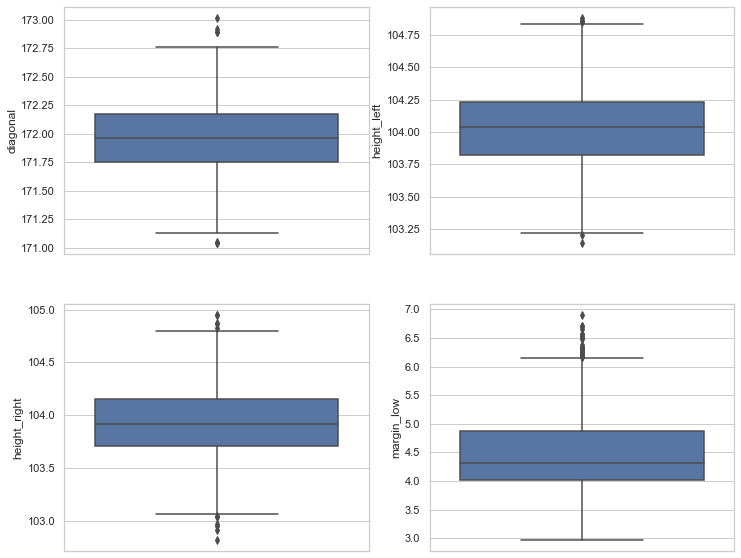

In [8]:
# Contrôle des valeurs "dite" abérrantes via l'affichage des champs en boxplots : 

plt.figure(figsize = (12, 10))
sns.set(style = 'whitegrid')
plt.subplot(221)
sns.boxplot(data = billet, y = 'diagonal')
plt.subplot(222)
sns.boxplot(data = billet, y = 'height_left')
plt.subplot(223)
sns.boxplot(data = billet, y = 'height_right')
plt.subplot(224)
sns.boxplot(data = billet, y = 'margin_low')

<AxesSubplot:ylabel='length'>

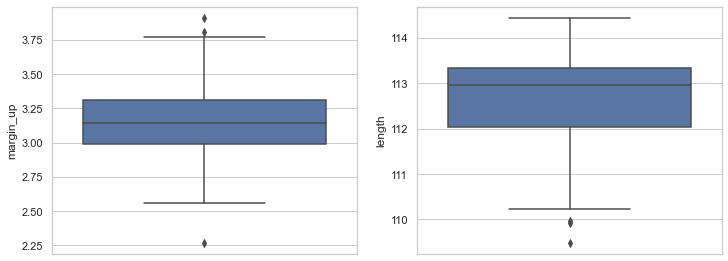

In [9]:
plt.figure(figsize = (12, 10))
sns.set(style = 'whitegrid')
plt.subplot(221)
sns.boxplot(data = billet, y = 'margin_up')
plt.subplot(222)
sns.boxplot(data = billet, y = 'length')

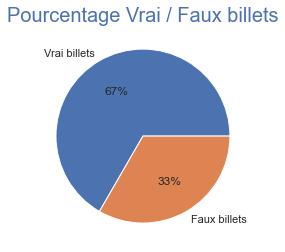

In [10]:
# Affichage du pourcentage de vrai/faux billets : 

pourcentage_billet = billet[['is_genuine']].value_counts()
labels = ['Vrai billets','Faux billets']
plt.pie(pourcentage_billet,labels = labels, autopct = '%0.f%%')
plt.title('Pourcentage Vrai / Faux billets', size = 20, color = 'b')
plt.show()

<Figure size 72x72 with 0 Axes>

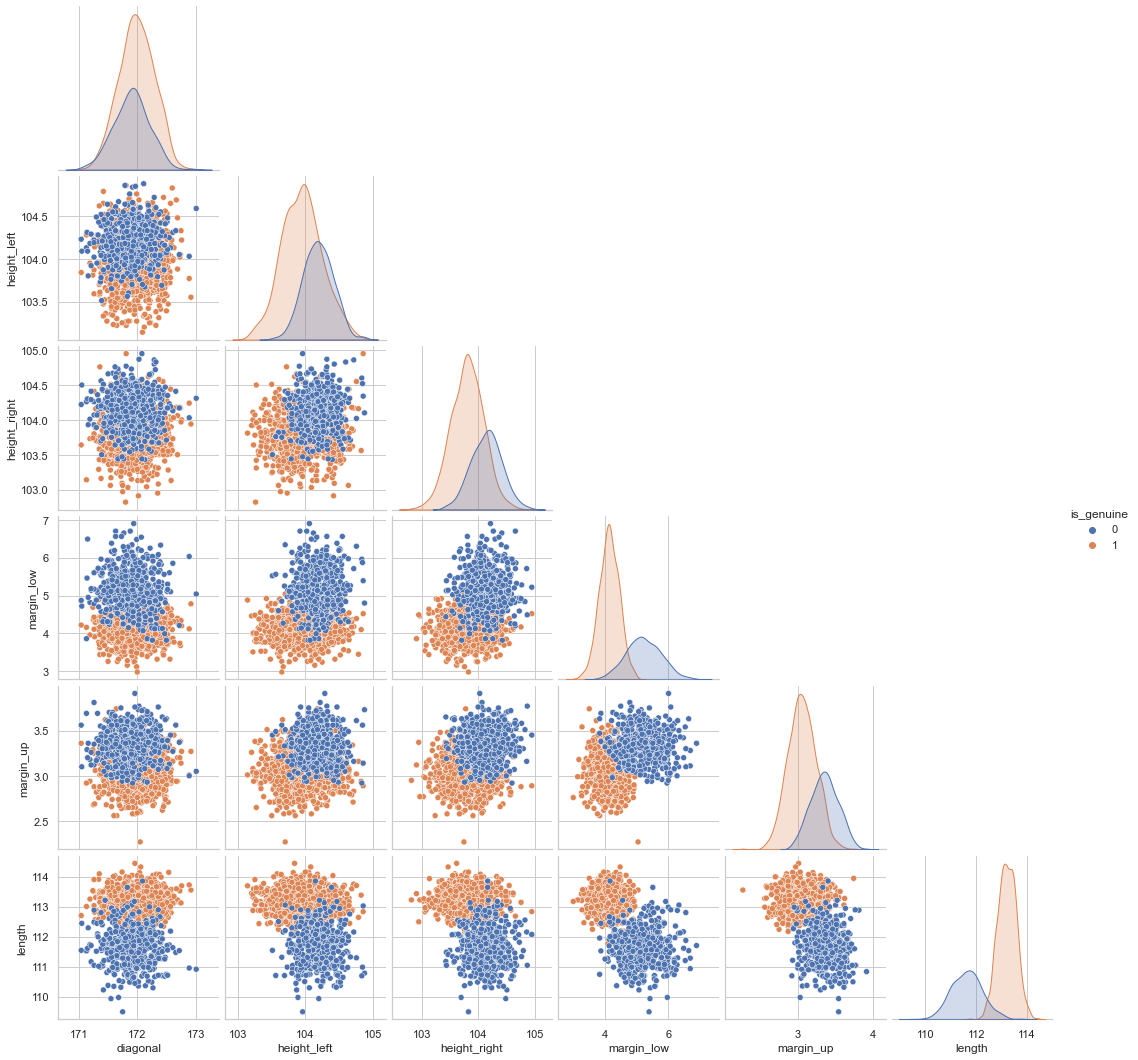

In [11]:
plt.figure(figsize=(1, 1))
sns.pairplot(billet,hue='is_genuine',corner=True)

In [12]:
# Separation des donnees de celles manquantes :

billet_test = billet[billet.isnull().any(axis=1)]
billet_test.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


In [13]:
billet_train = billet.dropna()
billet_train.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [14]:
# Création de X_train et Y_train :

x_train = billet_train.drop('margin_low', axis = 1)
y_train = billet_train['margin_low']

# Régréssion linéaire :

reg_lin = LinearRegression()
model_reg_lin = reg_lin.fit(x_train, y_train)

# Prédictions :

x_train = billet_train[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
billet_train['margin_low_pred'] = reg_lin.predict(x_train)

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_806/4289647655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billet_train['margin_low_pred'] = reg_lin.predict(x_train)


In [15]:
print("Intercept:", model_reg_lin.intercept_)
print("Coéfficients:", model_reg_lin.coef_)

Intercept: 2.8668228920543672
Coéfficients: [-1.14059676 -0.0130159   0.02829069  0.02674982 -0.21284432 -0.00388299]


In [16]:
# validation du modéle :

reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = billet_train)
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          2.60e-202
Time:                        18:00:36   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

In [17]:
# Moyenne des residus 'nulle' : 

res_lin.resid.mean()

8.009268800697069e-14

In [18]:
# Multicollinéarité ('is_genuine' étant une variables qualitative, elle n'est pas utilisé) :

vif = pd.Series([variance_inflation_factor(billet_train[["diagonal","height_left","height_right", "margin_up", "length"]].values, i)
               for i in range(billet_train[["diagonal","height_left","height_right", "margin_up", "length"]].shape[1])],
              index = billet_train[["diagonal","height_left","height_right", "margin_up", "length"]].columns)
print("VIF par features:\n", vif)
print("VIF moyen:",vif.mean())

VIF par features:
 diagonal        170566.670778
height_left     111895.309916
height_right    100858.864433
margin_up          261.969190
length           22708.222743
dtype: float64
VIF moyen: 81258.20741161003


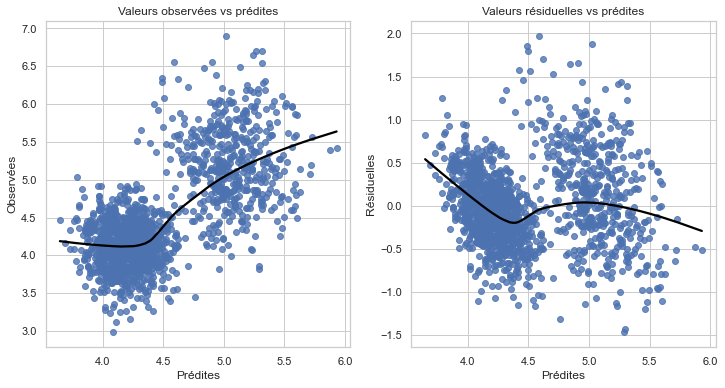

In [19]:
# Linéarité :

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1, 2, figsize = (12,6))
    
    sns.regplot(x = fitted_vals, y = y, lowess = True, ax = ax[0], line_kws = {'color': 'black'})
    ax[0].set_title("Valeurs observées vs prédites")
    ax[0].set(xlabel = "Prédites", ylabel = "Observées")

    sns.regplot(x = fitted_vals, y = resids, lowess = True, ax = ax[1], line_kws = {'color': 'black'})
    ax[1].set_title("Valeurs résiduelles vs prédites")
    ax[1].set(xlabel = "Prédites", ylabel = "Résiduelles")
    
linearity_test(res_lin, billet_train['margin_low'])

In [20]:
# Création du champ 'residu':

billet_train['residu'] = billet_train['margin_low'] - billet_train['margin_low_pred']
billet_train.head()

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_806/931272815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billet_train['residu'] = billet_train['margin_low'] - billet_train['margin_low_pred']


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred,residu
0,1,171.81,104.86,104.95,4.52,2.89,112.83,4.210681,0.309319
1,1,171.46,103.36,103.66,3.77,2.99,113.09,4.115999,-0.345999
2,1,172.69,104.48,103.50,4.40,2.94,113.16,4.137766,0.262234
3,1,171.36,103.91,103.94,3.62,3.01,113.51,4.134463,-0.514463
4,1,171.73,104.28,103.46,4.04,3.48,112.54,4.031004,0.008996


In [21]:
# Normalité :

print("P-value du test d'Aderson-Darling = ", normal_ad(billet_train['residu'])[1])

P-value du test d'Aderson-Darling =  3.9857722331535204e-05


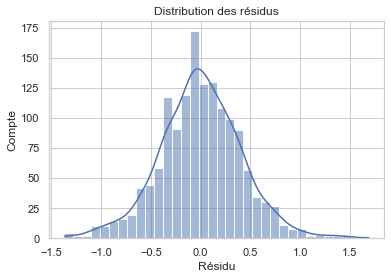

In [22]:
# Graphique:

sns.histplot(billet_train['residu'], kde=True)
plt.xlabel("Résidu")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

In [23]:
# Homocédasticité :

white_test = het_white(res_lin.resid, res_lin.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

{'Test Statistic': 109.8601519685849, 'p-value': 2.0828244990467605e-14, 'F-Statistic': 5.853731207796846, 'F-Test p-value': 4.974865092877112e-15}


Text(0.5, 1.0, 'Homocédasticité')

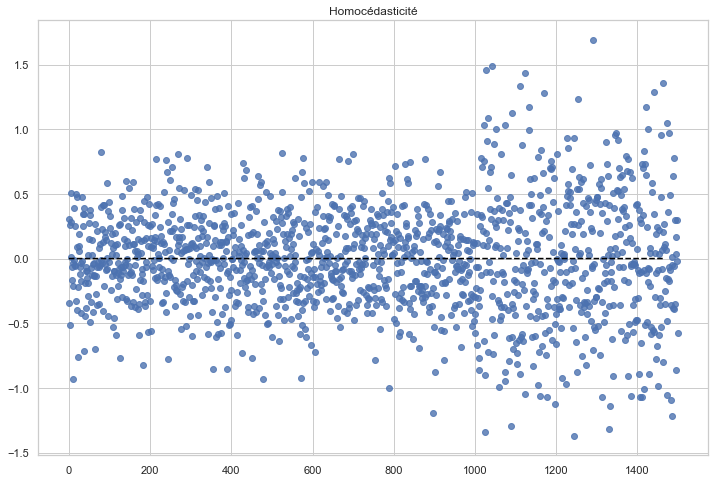

In [24]:
# Graphique :

plt.subplots(figsize = (12, 8))
plt.scatter(x = billet_train.index, y = billet_train['residu'], alpha = 0.8)
plt.plot(np.repeat(0, len(billet_train.index) + 2), color = "black", linestyle = '--')
plt.title("Homocédasticité")

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,margin_low,dfb_Intercept,dfb_diagonal,dfb_height_left,dfb_height_right,dfb_margin_up,dfb_length,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,4.52,0.038028,0.011150,-0.040676,-0.050650,0.028339,-0.018016,0.000894,-0.563593,0.016606,-0.073239,-0.563461,-0.073221
1,3.77,-0.047734,0.031782,0.040802,0.006819,0.006051,0.006096,0.000597,-0.769710,0.006015,-0.059874,-0.769603,-0.059866
2,4.40,-0.028752,0.034142,0.027975,-0.020340,-0.010975,-0.001295,0.000457,0.572488,0.008298,0.052367,0.572356,0.052355
3,3.62,-0.031981,0.060924,0.001406,-0.016400,0.006425,-0.029579,0.000936,-1.118681,0.004467,-0.074934,-1.118778,-0.074940
4,4.04,-0.025618,0.021411,-0.027128,0.056039,-0.049448,-0.009670,0.001171,-1.121058,0.005558,-0.083813,-1.121157,-0.083821


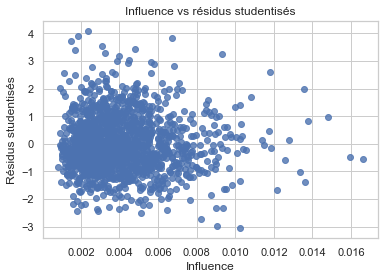

In [25]:
# Identification des individus atypiques :

student_resid = res_lin.get_influence().resid_studentized_external
(cooks, p_val_cooks) = res_lin.get_influence().cooks_distance
(dffits, p_val_dffits) = res_lin.get_influence().dffits
leverage = res_lin.get_influence().hat_matrix_diag

# Graphique :

sns.regplot(leverage, res_lin.resid_pearson, fit_reg = False)
plt.title("Influence vs résidus studentisés")
plt.xlabel("Influence")
plt.ylabel("Résidus studentisés")

# Création d'un dataframe de travail :

billet_atypique = pd.concat([billet_train["margin_low"], res_lin.get_influence().summary_frame()], axis = 1)
billet_atypique = billet_atypique.rename(columns = {"hat_diag": "leverage"})
billet_atypique.head()

In [26]:
# Studentisation des residus :

residu_stud = billet_atypique.student_resid
print ("résidus studentisés:\n", residu_stud.describe())

# Individus atypiques :

atypique = pd.DataFrame((billet_atypique["margin_low"][abs(residu_stud) > 2]))
print(atypique.count())

résidus studentisés:
 count    1463.000000
mean        0.000133
std         1.001419
min        -3.087577
25%        -0.660578
50%        -0.086814
75%         0.570403
max         4.127099
Name: student_resid, dtype: float64
margin_low    72
dtype: int64


In [27]:
# Identification des individus a forte influence :

k_reg_lin = 5          # k = nombre de variables predictives pour la regression lineaire +1 si on a une constante
n_reg_lin = 1500       # n = nombre d'observations
lev_thr = ((2*k_reg_lin)+2)/n_reg_lin          #=0.047 Seuil (threshold), toutes valeurs au dessus aura une forte influence

print(billet_atypique["leverage"].describe())

hg_leverage = billet_atypique["margin_low"][abs(billet_atypique["leverage"]) > lev_thr]
print("nombre d'individus à forte influence:", hg_leverage.count())

count    1463.000000
mean        0.004101
std         0.002134
min         0.000840
25%         0.002561
50%         0.003645
75%         0.005140
max         0.016606
Name: leverage, dtype: float64
nombre d'individus à forte influence: 79


In [28]:
# Identification des individus atypiques à forte influence :

outliers_hg_lev =pd.merge(atypique,hg_leverage, left_index=True, right_index=True)
print(outliers_hg_lev.count())
print(outliers_hg_lev)

margin_low_x    7
margin_low_y    7
dtype: int64
      margin_low_x  margin_low_y
664           5.04          5.04
965           3.45          3.45
1074          4.36          4.36
1089          3.86          3.86
1199          4.49          4.49
1329          3.82          3.82
1478          6.08          6.08


In [29]:
# Suppression des individus atypiques et influent :

billet_sans_atypique = billet.drop(outliers_hg_lev.index)
reg_lin_c = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = billet_sans_atypique)
model_reg_lin_b = reg_lin_c.fit()
print(model_reg_lin_b.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     282.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          5.39e-211
Time:                        18:01:26   Log-Likelihood:                -972.21
No. Observations:                1456   AIC:                             1956.
Df Residuals:                    1450   BIC:                             1988.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.2866      9.516      2.552   

In [30]:
# Application du modele sur les données test : 

x_test = billet_test[['is_genuine','diagonal','height_left','height_right', 'margin_up', 'length']]
billet_test['margin_low'] = reg_lin.predict(x_test)

# Concaténation :

reg_lin_result = [billet_test, billet_train]
billet_final = pd.concat(reg_lin_result)
billet_final.head()

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_806/3166623512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billet_test['margin_low'] = reg_lin.predict(x_test)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred,residu
72,1,171.94,103.89,103.45,4.064954,3.25,112.79,NaN,NaN
99,1,171.93,104.07,104.18,4.111990,3.14,113.08,NaN,NaN
151,1,172.07,103.80,104.38,4.134003,3.02,112.93,NaN,NaN
197,1,171.45,103.66,103.80,3.993571,3.62,113.27,NaN,NaN
241,1,171.83,104.14,104.06,4.140399,3.02,112.36,NaN,NaN


In [31]:
billet_final = billet_final.drop(['margin_low_pred', 'residu'], axis = 1)
billet_final.info()
billet_final.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482844,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659899,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Text(0.5, 1.0, 'Boîtes à moustaches')

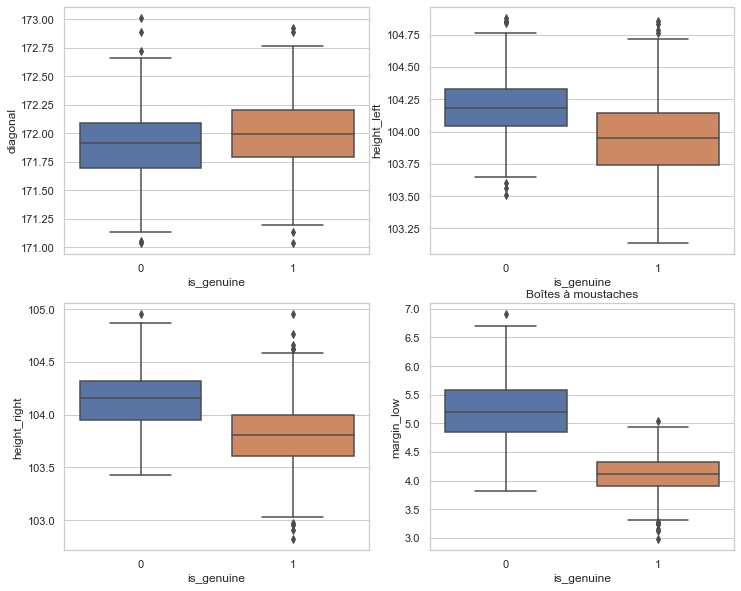

In [32]:
# Affichage des boxplot : 

plt.figure(figsize = (12, 10))
sns.set(style = "whitegrid")
plt.subplot(221)
sns.boxplot(x = "is_genuine", y = "diagonal", data = billet_final)
plt.subplot(222)
sns.boxplot(x = "is_genuine", y = "height_left", data = billet_final)
plt.subplot(223)
sns.boxplot(x = "is_genuine", y = "height_right", data = billet_final)
plt.subplot(224)
sns.boxplot(x = "is_genuine", y = "margin_low", data = billet_final)
plt.title('Boîtes à moustaches')

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

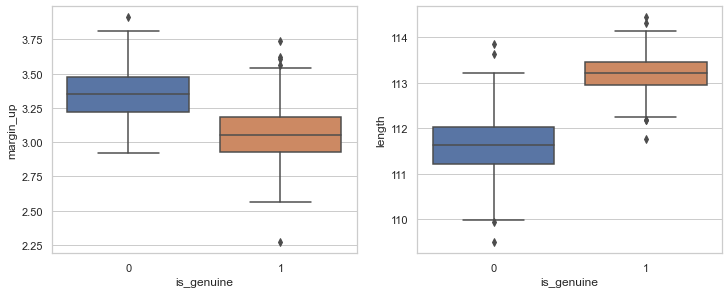

In [33]:
plt.figure(figsize = (12, 10))
sns.set(style = "whitegrid")
plt.subplot(221)
sns.boxplot(x = "is_genuine", y = "margin_up", data = billet_final)
plt.subplot(222)
sns.boxplot(x = "is_genuine", y = "length", data = billet_final)

In [34]:
# Identification des individus :

q1 = billet_final.loc[:, billet_final.columns != "is_genuine"].quantile(q=0.25, interpolation="midpoint")
q3 = billet_final.loc[:, billet_final.columns != "is_genuine"].quantile(q=0.75, interpolation="midpoint")
iq = q3 - q1

lim_inf = q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

In [35]:
# Isolation des variables y (Vrai) : 

y_billet = billet_final.loc[:, billet_final.columns == "is_genuine"]
print(y_billet.value_counts())                                  

# X (Faux) :

X_billet = billet_final.loc[:, billet_final.columns != "is_genuine"]
X_billet = sm.tools.add_constant(X_billet)                      
print(X_billet.head())

is_genuine
1             1000
0              500
dtype: int64
     const  diagonal  height_left  height_right  margin_low  margin_up  length
72     1.0    171.94       103.89        103.45    4.064954       3.25  112.79
99     1.0    171.93       104.07        104.18    4.111990       3.14  113.08
151    1.0    172.07       103.80        104.38    4.134003       3.02  112.93
197    1.0    171.45       103.66        103.80    3.993571       3.62  113.27
241    1.0    171.83       104.14        104.06    4.140399       3.02  112.36


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
# Regression logistique :

reg_log = Logit(endog = y_billet,exog = X_billet)
res_log = reg_log.fit()
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 0.026349
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.9586
Time:                        18:01:51   Log-Likelihood:                -39.524
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -230.4143    249.954     -0.922      0.357    -720.316     259.487
diagonal         0.256

In [37]:
# On ne garde que les variables significatives a 5% dans X_billet :

X_billet = billet_final[["height_right","margin_low", "margin_up", "length"]]
X_billet = sm.add_constant(X_billet)
reg_log = Logit(endog = y_billet,exog = X_billet)
model_reg_log = reg_log.fit()
print(model_reg_log.summary2())

Optimization terminated successfully.
         Current function value: 0.026815
         Iterations 13
                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.958   
Dependent Variable:   is_genuine       AIC:              90.4453 
Date:                 2023-03-10 18:01 BIC:              117.0114
No. Observations:     1500             Log-Likelihood:   -40.223 
Df Model:             4                LL-Null:          -954.77 
Df Residuals:         1495             LLR p-value:      0.0000  
Converged:            1.0000           Scale:            1.0000  
No. Iterations:       13.0000                                    
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------
const        -285.3339 139.1600 -2.0504 0.0403 -558.0825 -12.5852
height_right   -3.3223   1.1166 -2.9752 0.0029   -5.5109  -1.1337

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
# Test de Wald :

print("avant élimination des variables non-significatives:\n", res_log.wald_test_terms())
print("après élimination des variables non-significatives:\n", model_reg_log.wald_test_terms())

avant élimination des variables non-significatives:
                    chi2        P>chi2  df constraint
const          0.849762  3.566196e-01              1
diagonal       0.050920  8.214699e-01              1
height_left    1.321586  2.503076e-01              1
height_right   6.414664  1.131817e-02              1
margin_low    37.199053  1.066656e-09              1
margin_up     21.797391  3.030119e-06              1
length        45.578314  1.466563e-11              1
après élimination des variables non-significatives:
                    chi2        P>chi2  df constraint
const          4.204144  4.032532e-02              1
height_right   8.852048  2.927601e-03              1
margin_low    42.867504  5.857562e-11              1
margin_up     22.436899  2.171616e-06              1
length        48.086602  4.078036e-12              1


In [39]:
# Test binarite :

print(billet_final["is_genuine"].nunique())

2


In [40]:
# Test Box-Tidwell :

var_cont = ["height_right","margin_low","margin_up","length"]                    

# Ajout de variables : 

for var in var_cont:
    billet_final[f'{var}:log_{var}'] = billet_final[var].apply(lambda x: x * np.log(x))

# On ne garde que les colonnes concernant les variables continues :

cols_to_keep = var_cont + billet_final.columns.tolist()[-len(var_cont):]

# Inclusion des ln dans les variables :

X_lt = billet_final[cols_to_keep]
X_lt = sm.add_constant(X_lt, prepend=False)
y_lt = billet_final["is_genuine"]

# Construction du modele :

logit_results = GLM(y_lt, X_lt).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1491
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                        0.035251
Method:                          IRLS   Log-Likelihood:                 385.05
Date:                Fri, 10 Mar 2023   Deviance:                       52.560
Time:                        18:02:01   Pearson chi2:                     52.6
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
height_right  

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# On ne garde que les variables qui passent le Test de Box-Tidewell :

X_billet_a = billet_final[["height_right","margin_low"]]
X_billet_a = sm.add_constant(X_billet_a)
reg_log = Logit(endog = y_billet,exog = X_billet_a)
model_reg_log_a = reg_log.fit()
print(model_reg_log_a.summary2())

Optimization terminated successfully.
         Current function value: 0.179318
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.718      
Dependent Variable: is_genuine       AIC:              543.9536   
Date:               2023-03-10 18:02 BIC:              559.8932   
No. Observations:   1500             Log-Likelihood:   -268.98    
Df Model:           2                LL-Null:          -954.77    
Df Residuals:       1497             LLR p-value:      1.4563e-298
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const          414.2970  44.2654   9.3594 0.0000 327.5385 501.0556
height_right    -3.7018   0.4214  -8.7848 0.0000  -4.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# Application du modèle avec suppression des colonnes non pertinantes :

billet_final_1 = billet_final.drop(["margin_low:log_margin_low","height_right:log_height_right","margin_up:log_margin_up","length:log_length"], axis=1)
billet_final_1["proba"] = model_reg_log.predict(X_billet)
billet_final_1["y_pred"] = (model_reg_log.predict(X_billet) >= 0.5).astype(int)
billet_final_1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,proba,y_pred
72,1,171.94,103.89,103.45,4.064954,3.25,112.79,0.997694,1
99,1,171.93,104.07,104.18,4.111990,3.14,113.08,0.998127,1
151,1,172.07,103.80,104.38,4.134003,3.02,112.93,0.996980,1
197,1,171.45,103.66,103.80,3.993571,3.62,113.27,0.988619,1
241,1,171.83,104.14,104.06,4.140399,3.02,112.36,0.964849,1


[[32.8         0.53333333]
 [ 0.2        66.46666667]]


Text(0.5, 1.0, 'Matrice de confusion de la régression logistique\n')

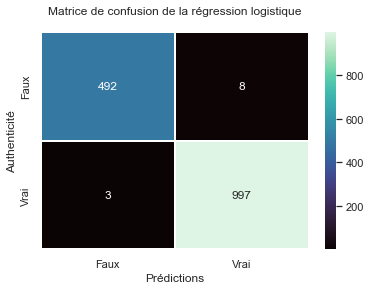

In [43]:
# Matrice de confusion : 

conf_matrix_reg_log = model_reg_log.pred_table()
prct = (conf_matrix_reg_log*100)/n_reg_lin
print(prct)
sns.heatmap(conf_matrix_reg_log,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Authenticité")
plt.title("Matrice de confusion de la régression logistique\n")

In [44]:
print("Précision:",accuracy_score(billet_final_1["is_genuine"], billet_final_1["y_pred"]))
print("Spécificité:",precision_score(billet_final_1["is_genuine"], billet_final_1["y_pred"]))
print("Sensibilité:",recall_score(billet_final_1["is_genuine"], billet_final_1["y_pred"]))

Précision: 0.9926666666666667
Spécificité: 0.9920398009950249
Sensibilité: 0.997


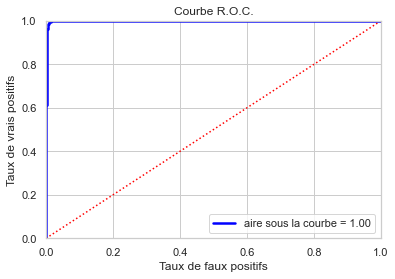

In [45]:
# Courbe R.O.C.:
fpr, tpr, _ = roc_curve(billet_final_1["is_genuine"],billet_final_1["proba"])
roc_auc = roc_auc_score(billet_final_1["is_genuine"],billet_final_1["proba"])
plt.title("Courbe R.O.C.")
plt.plot(fpr,
        tpr,
        color="blue",
        linewidth=2.5,
        label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="red", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Taux de vrais positifs")
plt.xlabel("Taux de faux positifs")
plt.show()

In [47]:
# Application à notre jeu de donné 'billet_prod' :

X_test = billet_prod[["height_right","margin_low","margin_up","length"]]
X_test = sm.add_constant(X_test)
billet_prod["proba"] = model_reg_log.predict(X_test)
billet_prod["y_pred"] = (model_reg_log.predict(X_test) >= 0.5).astype(int)
print(billet_prod[["id","proba","y_pred"]])
print("\nIndetification des billets:")
for i, k in zip(billet_prod["y_pred"],billet_prod["id"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

    id     proba  y_pred
0  A_1  0.000030       0
1  A_2  0.000002       0
2  A_3  0.000010       0
3  A_4  0.996169       1
4  A_5  0.999993       1

Indetification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
# Création du df X : 
X = billet_final.set_index(['is_genuine'])
X

,diagonal,height_left,height_right,margin_low,margin_up,length,height_right:log_height_right,margin_low:log_margin_low,margin_up:log_margin_up,length:log_length
is_genuine,,,,,,,,,,
1,171.94,103.89,103.45,4.064954,3.25,112.79,479.913695,5.700700,3.830629,532.992267
1,171.93,104.07,104.18,4.111990,3.14,113.08,484.032800,5.813972,3.592860,534.653043
1,172.07,103.80,104.38,4.134003,3.02,112.93,485.162215,5.867169,3.337876,533.793928
1,171.45,103.66,103.80,3.993571,3.62,113.27,481.887968,5.529841,4.657036,535.741541
1,171.83,104.14,104.06,4.140399,3.02,112.36,483.355334,5.882647,3.337876,530.531111
...,...,...,...,...,...,...,...,...,...,...
0,171.75,104.38,104.17,4.420000,3.09,111.28,483.976339,6.568737,3.486049,524.356874
0,172.19,104.63,104.44,5.270000,3.37,110.97,485.501115,8.758900,4.094256,522.586570
0,171.80,104.01,104.12,5.510000,3.36,111.95,483.694050,9.403171,4.072122,528.185960


In [49]:
# Centrage / réduction des données pour que nos données puissent prendre la même importance : 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-0.06044051, -0.46610259, -1.44479235, ..., -0.63568755,
         0.41047568,  0.12720668],
       [-0.09321736,  0.13517643,  0.79778359, ..., -0.56849768,
        -0.06646091,  0.45992513],
       [ 0.36565855, -0.76674211,  1.41218796, ..., -0.53694317,
        -0.57792838,  0.28781076],
       ...,
       [-0.51931643, -0.06524991,  0.61346228, ...,  1.5605159 ,
         0.89488175, -0.83568517],
       [ 0.3328817 ,  0.83666863,  0.42914097, ...,  1.02101416,
         1.34152653, -0.49193969],
       [-1.6009525 ,  0.40241156, -0.30814427, ...,  0.19181044,
         0.93928047, -0.69820628]])

In [50]:
# Calcul des composantes principales : 

pca = PCA(n_components = 10)
pca.fit(X_scaler)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[4.93484235e-01 1.43218634e-01 1.18787817e-01 9.94544332e-02
 8.11218554e-02 6.38534544e-02 5.45714329e-05 2.49676855e-05
 2.41667670e-08 7.48200176e-09]
[4.93813444e+00 1.43314177e+00 1.18867062e+00 9.95207804e-01
 8.11759727e-01 6.38960518e-01 5.46078381e-04 2.49843417e-04
 2.41828889e-07 7.48699309e-08]


In [51]:
pcs = pca.components_

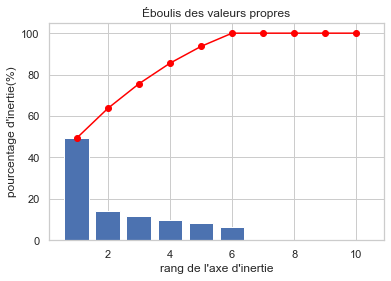

In [52]:
# Définition de la fonction pour le graphique Éboulis des valeurs propres : 

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)
    
# Affichage d'un graphique 'Eboulis des valeur propres' : 

display_scree_plot(pca)

In [53]:
# Calcule de la variance et de la variance cumulé pour chaque dimenssion : 

variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)], 
        "Variance" : pca.explained_variance_,
        "% variance" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance,% variance,% cum. variance
0,Dim1,4.938134e+00,49.0,49.0
1,Dim2,1.433142e+00,14.0,64.0
2,Dim3,1.188671e+00,12.0,76.0
3,Dim4,9.952078e-01,10.0,85.0
4,Dim5,8.117597e-01,8.0,94.0
5,Dim6,6.389605e-01,6.0,100.0
6,Dim7,5.460784e-04,0.0,100.0
7,Dim8,2.498434e-04,0.0,100.0
8,Dim9,2.418289e-07,0.0,100.0
9,Dim10,7.486993e-08,0.0,100.0


In [54]:
X_pca = pca.transform(X)

In [55]:
# Création d'un df pour 2 dimenssions : 

X_pca_df = pd.DataFrame({
    'f1' : X_pca[:,0], 
    'f2' : X_pca[:,1],
})
X_pca_df.head()

,f1,f2
0,-63.681291,470.577067
1,-63.048121,473.937630
2,-62.425629,474.728323
3,-63.979985,472.072771
4,-61.468039,472.868245


In [56]:
# Définition de la fonction pour le graphique Cercle de corrélation

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(20, 20))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='17', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.figure(figsize=[60, 25])
            plt.show(block=False)

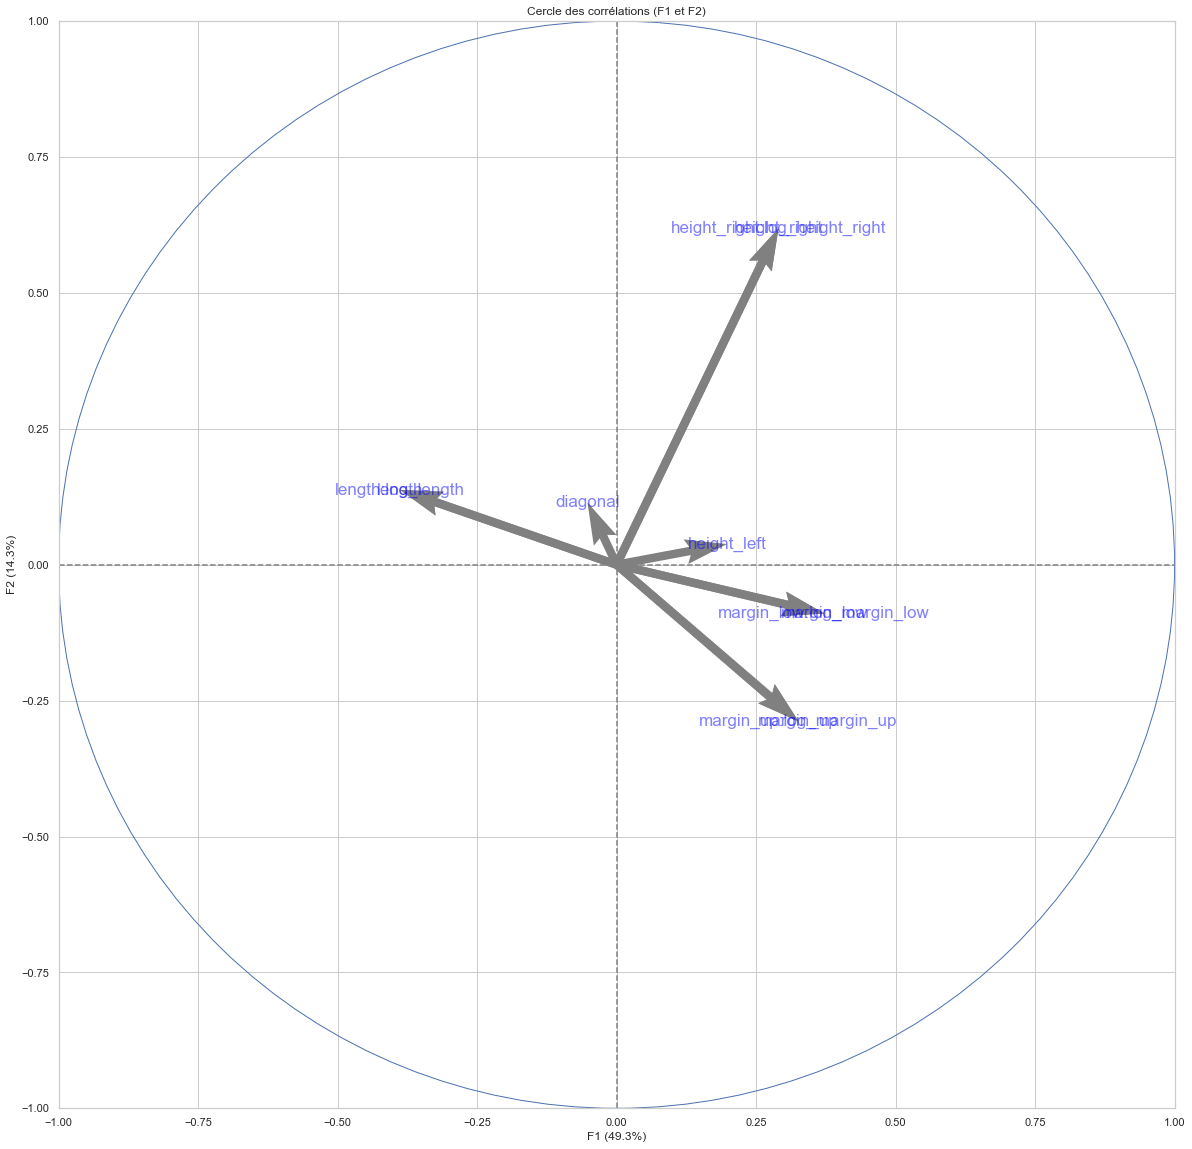

<Figure size 4320x1800 with 0 Axes>

In [57]:
# Cercle des corrélations en fonction de F1 et F2 : 

display_circles(pcs, 10, pca, [(0,1)], labels = np.array(X.columns))

In [58]:
def plot_dendrogram(Z, names, figsize=(15,30)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
        leaf_font_size=12,
    )

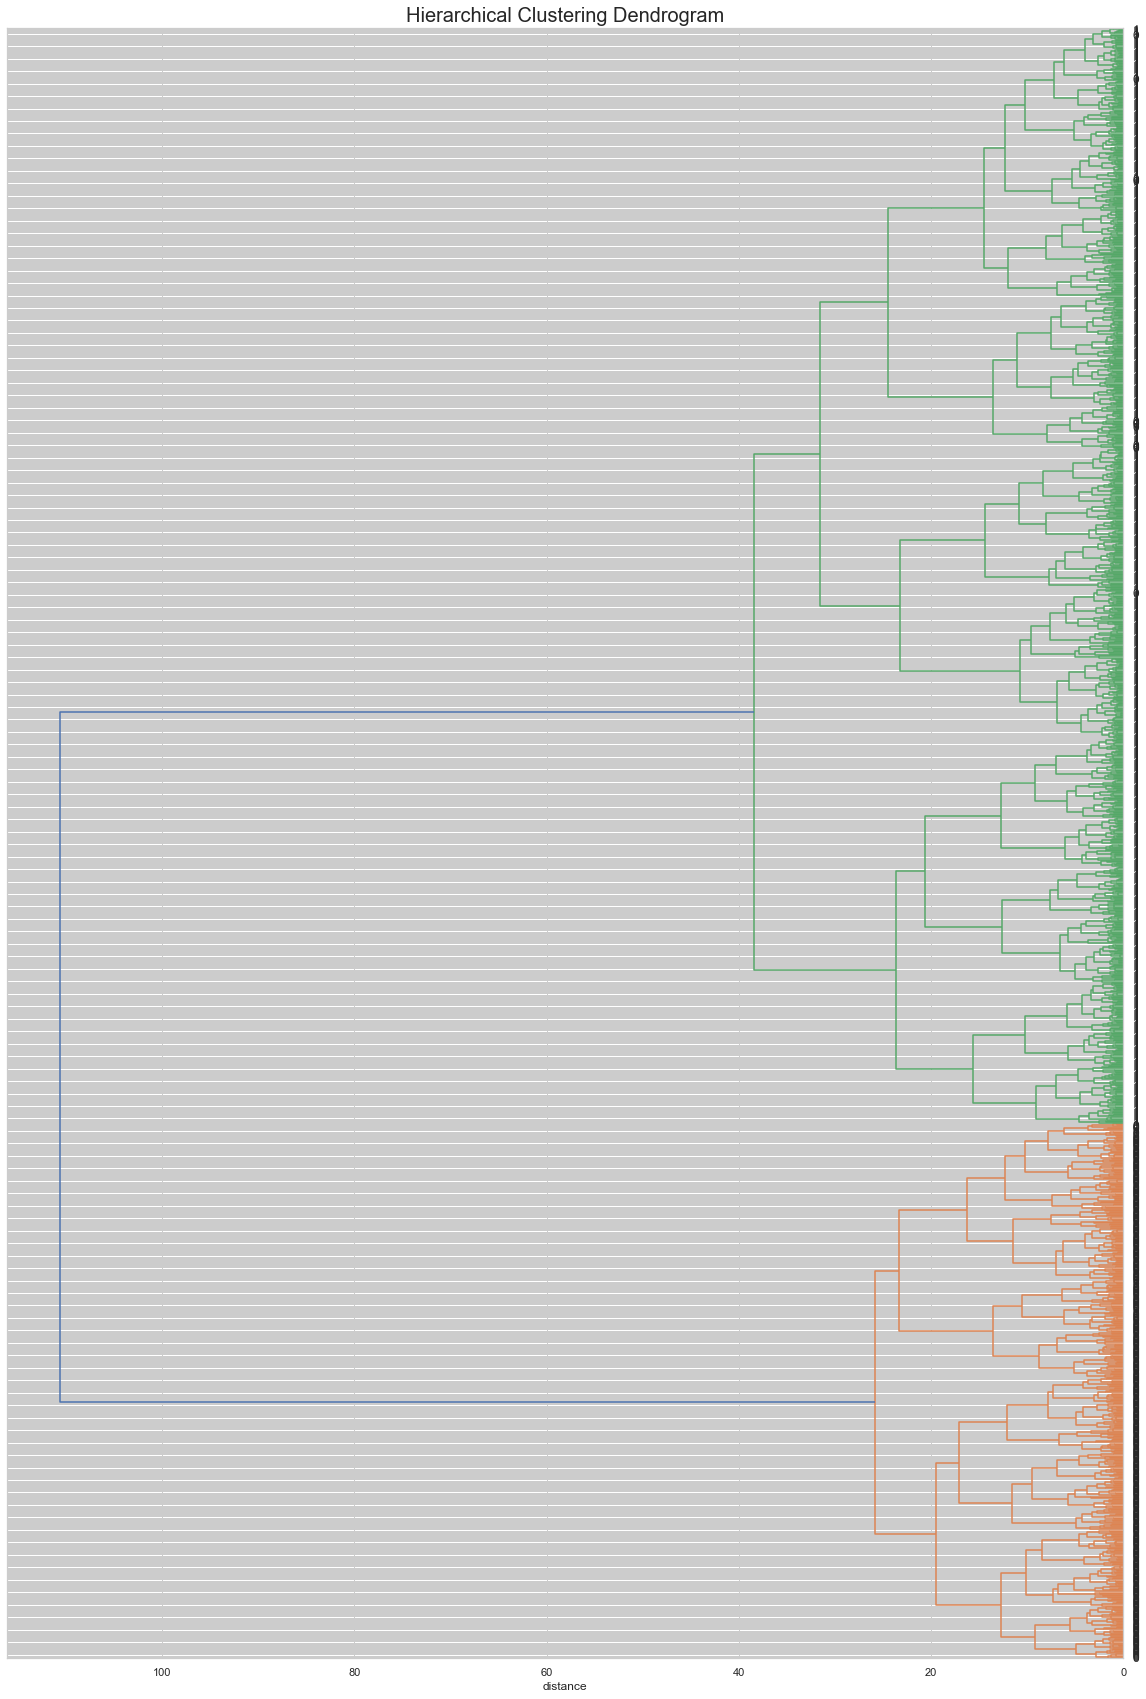

In [59]:
# Clustering hiérarchique : 

from scipy.cluster.hierarchy import linkage
Z = linkage(X_scaler, 'ward')
names = X.index

# Affichage du dendrogramme : 

from scipy.cluster.hierarchy import dendrogram
plot_dendrogram(Z, names,figsize=(20,30))

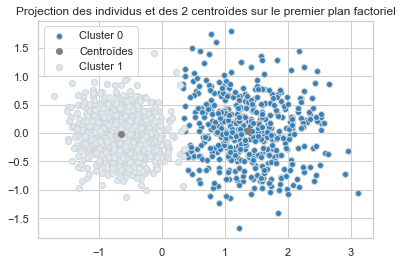

In [60]:
# 2 clusters (vrai/faux) :

n_clust = 2

# Clustering par K-means :

km = KMeans(n_clusters = n_clust,random_state = 1994)
x_km = km.fit_transform(billet_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

# Ajout d'une colonne contenant le cluster attribue :

clusters_km = km.labels_
centroids_km = km.cluster_centers_

# Clustering par projection des individus sur le premier plan factoriel :

pca_km = decomposition.PCA(n_components = 3).fit(billet_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components = 3).fit_transform(billet_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_km_projected = pca_km.transform(centroids_km)


for couleur,k in zip(["#3182bd","#dbe9f3"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1],color="grey",label="Centroïdes")
plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroids_km)))
plt.show()

In [66]:
# Vérrfication de la classification, Matrice de confusion :

km_matrix = pd.crosstab(clusters_km,billet_final["is_genuine"])
print(km_matrix)

is_genuine    0    1
row_0               
0           481    2
1            19  998


Text(0.5, 1.0, 'Matrice de confusion K-means\n')

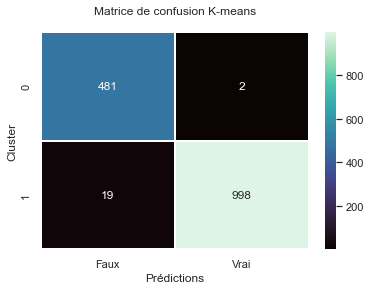

In [67]:
# Graphique :

sns.heatmap(km_matrix,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")

In [61]:
# Predictions sur des donnees inconnues :

x_test_km = billet_prod[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

billet_prod["cluster_pred"] = km.predict(x_test_km)
print(billet_prod[["id","cluster_pred"]])

    id  cluster_pred
0  A_1             0
1  A_2             0
2  A_3             0
3  A_4             1
4  A_5             1


In [62]:
# Importation donnée Test founit par évaluateur : 

billet_test1 = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_10/billets_test.csv')
billet_test1

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [68]:
# Application de notre modele de régréssion à notre jeu de données 'billet_test1' :

X_test_2 = billet_test1[["height_right","margin_low","margin_up","length"]]
X_test_2 = sm.add_constant(X_test_2)
billet_test1["proba"] = model_reg_log.predict(X_test_2)
billet_test1["y_pred"] = (model_reg_log.predict(X_test_2) >= 0.5).astype(int)
print(billet_test1[["id","proba","y_pred"]])
print("\nIndetification des billets:")
for i, k in zip(billet_test1["y_pred"],billet_test1["id"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

    id         proba  y_pred
0  B_1  9.992665e-01       1
1  B_2  2.044131e-04       0
2  B_3  9.999719e-01       1
3  B_4  9.737441e-08       0
4  B_5  1.257406e-03       0

Indetification des billets:
Le billet B_1 est vrai
Le billet B_2 est faux
Le billet B_3 est vrai
Le billet B_4 est faux
Le billet B_5 est faux


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
# Application de notre modèle de K_means sur notre jeu de données 'billet_test1' : 

x_test_km_2 = billet_test1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

billet_test1["cluster_pred"] = km.predict(x_test_km_2)
print(billet_test1[["id","cluster_pred"]])

    id  cluster_pred
0  B_1             1
1  B_2             0
2  B_3             1
3  B_4             0
4  B_5             0
